### PROBLEM STATEMENT: 

To build a Logistic Regression Model to assign a lead score between 0 to 100 to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [416]:
#importing necessary datasets
df=pd.read_csv("Leads.csv")
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [417]:
#inspecting the number of rows and columns
df.shape

(9240, 37)

In [418]:
#inspecting datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [419]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


### Missing value treatment

In [420]:
def missing_values(data):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).head(18)

In [421]:
#function to find missing values
missing_values(df)

,Total,Percent
Lead Quality,4767,51.590909
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Asymmetrique Activity Index,4218,45.649351
Tags,3353,36.287879
What matters most to you in choosing a course,2709,29.318182
Lead Profile,2709,29.318182
What is your current occupation,2690,29.112554
Country,2461,26.634199


On analyzing data there are many fields in Category column with the label "select", which means the customer has not opted out to select any option which again is a null value and we need to convert these data into "Null"

In [422]:
# Rechecking the missing values 

df=df.replace("Select", np.NaN ) 
missing_values(df)

,Total,Percent
How did you hear about X Education,7250,78.463203
Lead Profile,6855,74.188312
Lead Quality,4767,51.590909
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Asymmetrique Activity Index,4218,45.649351
City,3669,39.707792
Specialization,3380,36.580087
Tags,3353,36.287879


with almost missing values greater than 70% , we are dropping the "How did you hear about X Education" and "Lead Profile" columns from the data set

In [423]:
df.drop(["How did you hear about X Education","Lead Profile"],axis=1, inplace=True)
missing_values(df)

,Total,Percent
Lead Quality,4767,51.590909
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Asymmetrique Activity Index,4218,45.649351
City,3669,39.707792
Specialization,3380,36.580087
Tags,3353,36.287879
What matters most to you in choosing a course,2709,29.318182
What is your current occupation,2690,29.112554


In [424]:
#function to get countplot of a feature
def count_plot(feature):
    a=sns.countplot(df[feature])
    a.set_xticklabels( a.get_xticklabels(), rotation=90 ) 
    
    
#function to impute missing values
def impute_missing_values(data,feature,to_be_replaced_with):
    data[feature]=data[feature].replace( np.NaN, to_be_replaced_with ) 


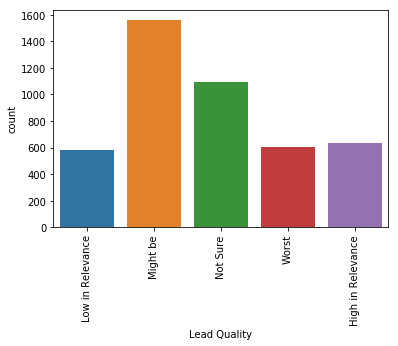

In [425]:
#inspecting lead quality

count_plot("Lead Quality")

Lead quality indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.since the employee has not enetered the labels,We can categorize the missing values into new label "not enetered"

In [426]:
impute_missing_values(df,"Lead Quality",to_be_replaced_with="not enetered")

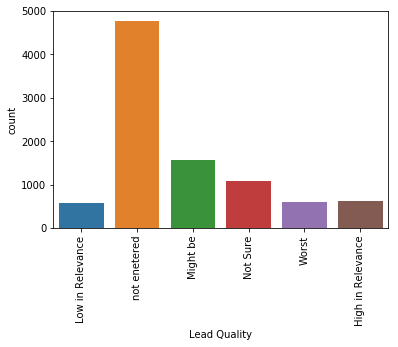

In [427]:
count_plot("Lead Quality")

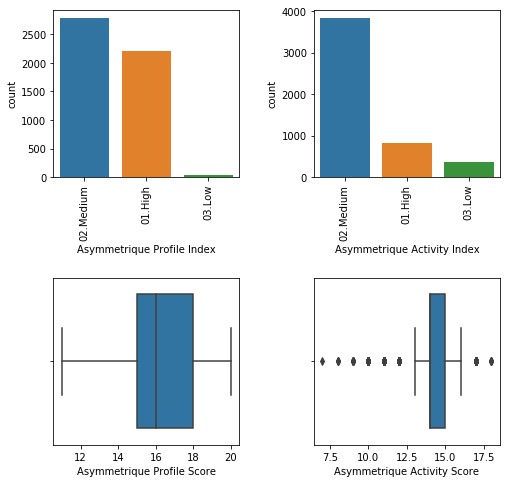

In [428]:
#inspecting "Asymmetrique Profile Score", "Asymmetrique Activity Score", "Asymmetrique Profile Index","Asymmetrique Activity Index"

plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.subplot(2,2,1)
count_plot("Asymmetrique Profile Index")
plt.subplot(2,2,2)
count_plot("Asymmetrique Activity Index")
plt.subplot(2,2,3)
sns.boxplot(df["Asymmetrique Profile Score"])
plt.subplot(2,2,4)
sns.boxplot(df["Asymmetrique Activity Score"])

Since the variation is larger for these features, imputing values may yield incorrect results and hence dropping these variables

In [429]:
#dropping the above mentioned four features
df.drop(["Asymmetrique Profile Score", "Asymmetrique Activity Score", "Asymmetrique Profile Index","Asymmetrique Activity Index"], axis=1, inplace= True)

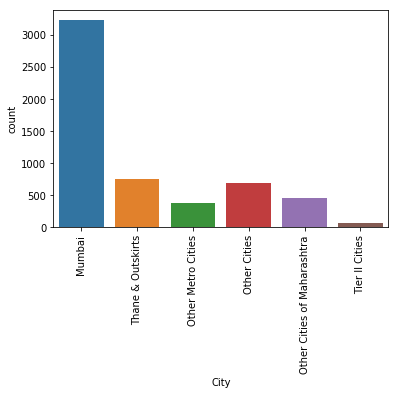

In [430]:
#inspecting city

count_plot("City")

Since Mumbai is prevelent in more datas we are imputing the missing values with "Mumbai"

In [431]:
impute_missing_values(df,"City","Mumbai")

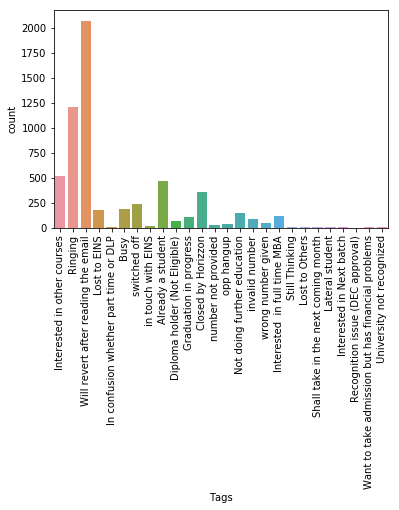

In [432]:
#Inspecting Tags:
count_plot("Tags")

Since "Will revert after reading mail" is higher in number than other items, we are replacing the missing values with the same

In [433]:
impute_missing_values(df,"Tags",'Will revert after reading the email')

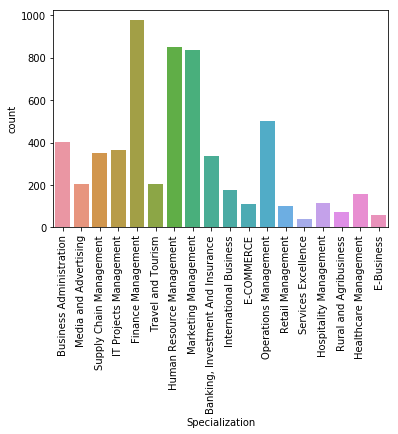

In [434]:
#inspecting specialization:

count_plot("Specialization")

Since the data doesnt show any difference , we can categorize the null values into new lavel " others"

In [435]:
impute_missing_values(df,"Specialization","others")

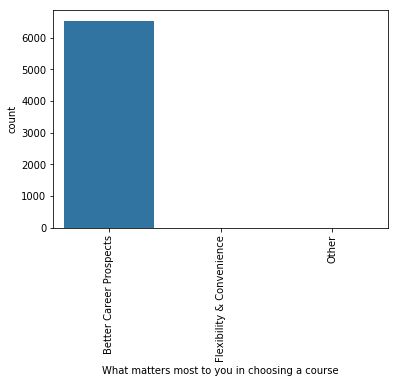

In [436]:
#inspecting "What matters most to you in choosing a course"

count_plot("What matters most to you in choosing a course")

In [437]:
impute_missing_values(df,"What matters most to you in choosing a course","Better Career Prospects")

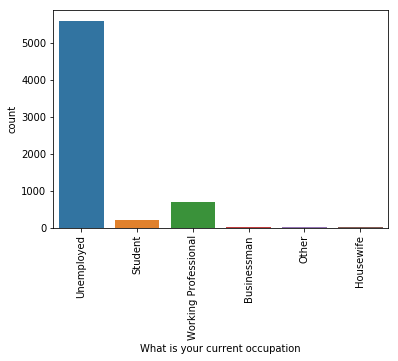

In [438]:
#inspecting "What is your current occupation"

count_plot("What is your current occupation")

We are imputing the missing values with "Unemployed"

In [439]:
impute_missing_values(df,"What is your current occupation","Unemployed")

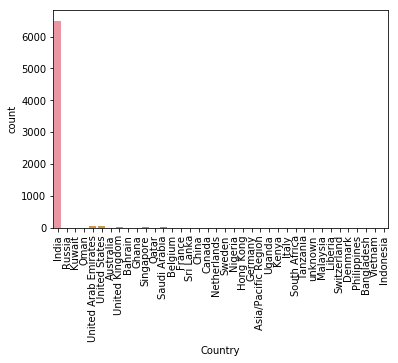

In [440]:
#inspecting country 

count_plot("Country")

replacing the missing value with "India" by its higher count

In [441]:
impute_missing_values(df,"Country","India")

In [442]:
#the other three features are less than 2% hwnce we are dropping these rows
df.dropna(inplace = True)

In [443]:
missing_values(df)

,Total,Percent
Last Notable Activity,0,0.0
What matters most to you in choosing a course,0,0.0
Lead Number,0,0.0
Lead Origin,0,0.0
Lead Source,0,0.0
Do Not Email,0,0.0
Do Not Call,0,0.0
Converted,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0


### Data Visualization

#### Uni variate analysis

In [444]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [445]:
category=[]
numeric=[]
for i in df.columns:
    if df[i].dtypes == "object" :
        category.append(i)
    else:
        numeric.append(i)
print(category)
print("-----------------------------------------")
print(numeric)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']
-----------------------------------------
['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [446]:
category.remove('Prospect ID')

In [447]:
len(category)

25

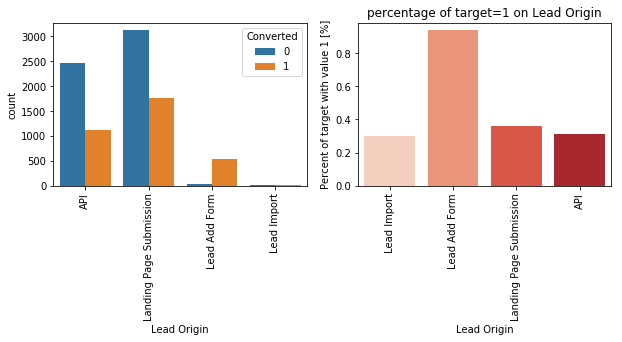

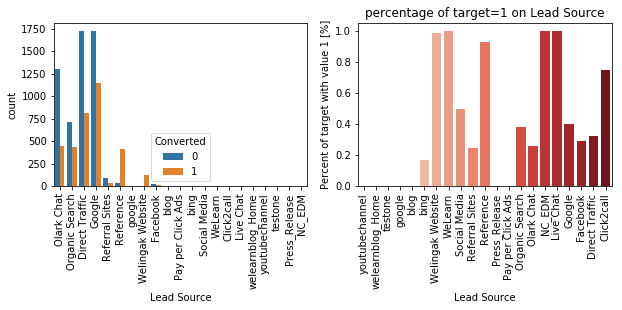

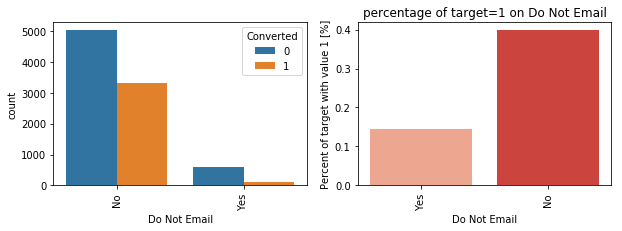

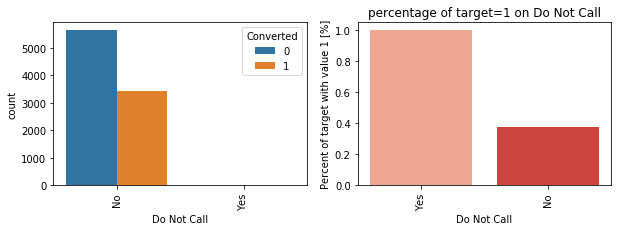

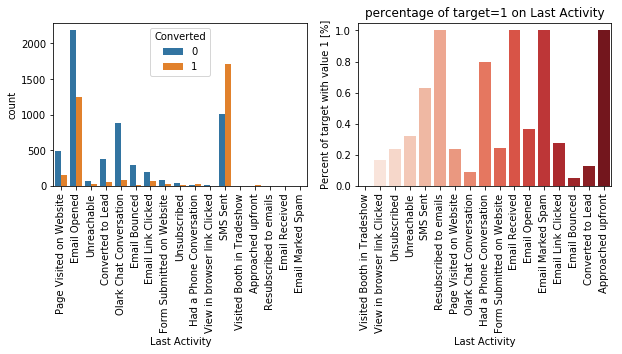

In [448]:

#plt.subplots_adjust(hspace=0.6, wspace=0.4)

for i in category[0:5]:
    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,1)
    a=sns.countplot(x=i,hue="Converted",data=df)
    a.set_xticklabels( a.get_xticklabels(), rotation=90 )
    
  
    
    plt.subplot(1,2,2)
    cat_perc = df[[i, 'Converted']].groupby([i],as_index=False).mean()
    cat_perc.sort_values(by=i,ascending=False,inplace=True)
    s = sns.barplot(x = i, y='Converted', order=cat_perc[i], data=cat_perc,palette="Reds")
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.title("percentage of target=1 on "+i)
    plt.show()



### Inference:

1. There are lot of people in landing page submission, but more people are converted  into leads one who enters lead add form

2. Google and Direct traffic generates maximum number of leads.Conversion Rate of reference leads and leads through welingak website,live chat is high.

3. people who didnot opt for email still has higher conversion rate

4. people who  didnot opted "Do Not Call"  has higher conversion rate

5. Most of the lead have their Email opened as their last activity.conversion rate for leads with last activity as SMS Sent is almost 60%


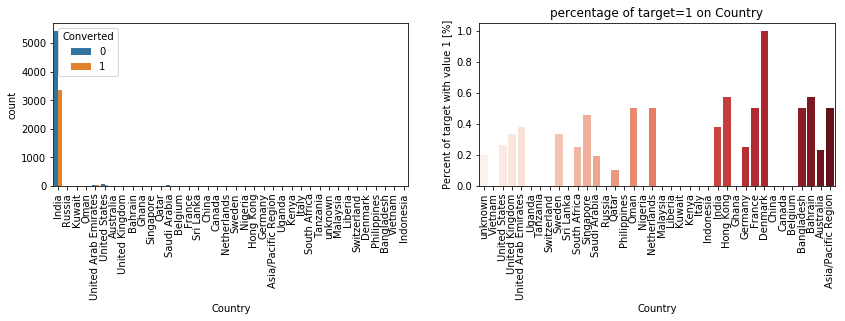

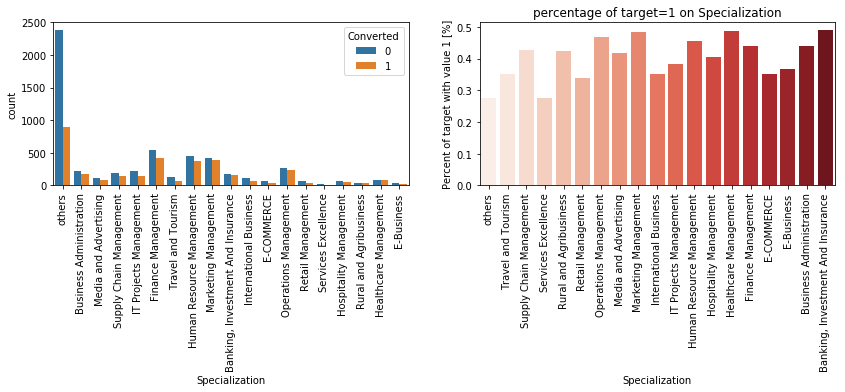

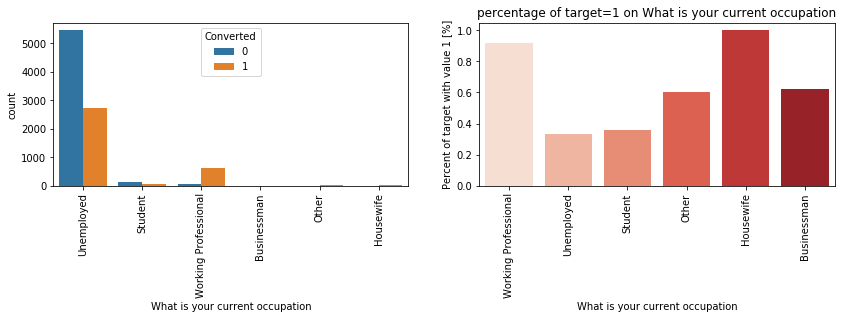

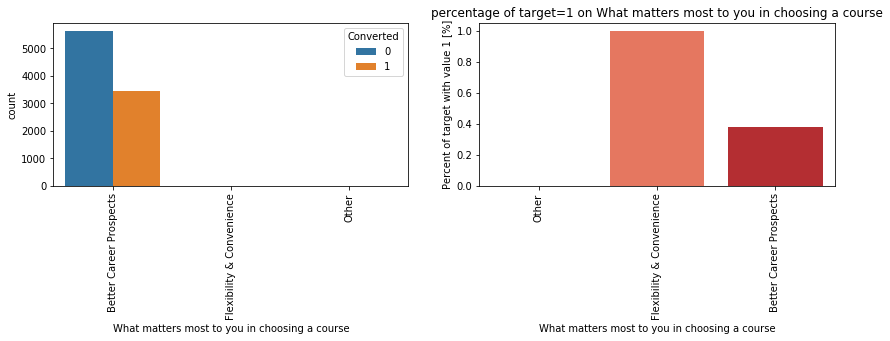

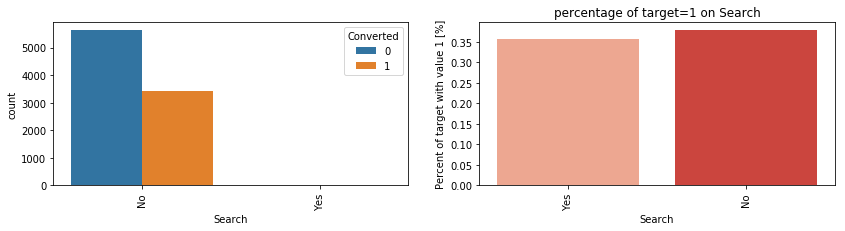

In [449]:

#plt.subplots_adjust(hspace=0.6, wspace=0.4)

for i in category[5:10]:
    plt.figure(figsize=(14,3))
    
    plt.subplot(1,2,1)
    a=sns.countplot(x=i,hue="Converted",data=df)
    a.set_xticklabels( a.get_xticklabels(), rotation=90 )
    
  
    
    plt.subplot(1,2,2)
    cat_perc = df[[i, 'Converted']].groupby([i],as_index=False).mean()
    cat_perc.sort_values(by=i,ascending=False,inplace=True)
    s = sns.barplot(x = i, y='Converted', order=cat_perc[i], data=cat_perc,palette="Reds")
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.title("percentage of target=1 on "+i)
    plt.show()


### Inference:   
    

1.Most of the counts are from India and around 40 % are converted into leads

2.Leads belonging to Marketing management, Healthcare Management and Banking,Investments and Insurance have high conversion rate of 50%

3.Working Professionals going for the course have high chances of joining it.Unemployed leads are the most in numbers but has around 30% conversion rate.

4.More numbers are for better career Prospects but has only 40% of chance of converting into leads

5.No conclusion can be drawn for Search as more number of entries are for No

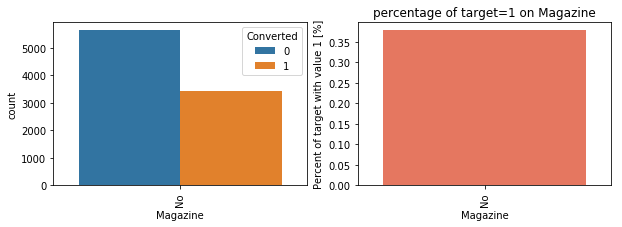

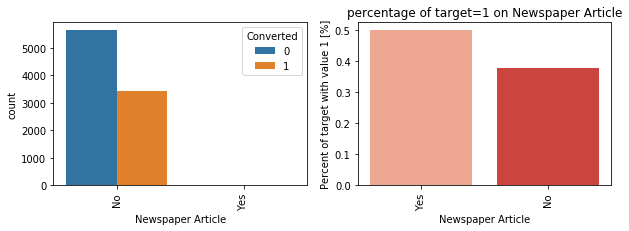

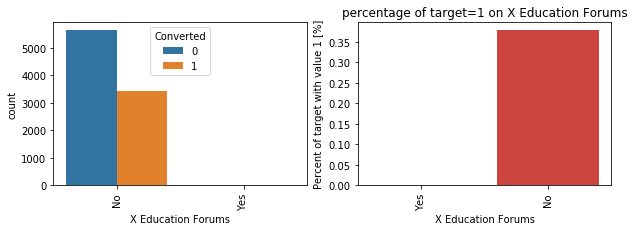

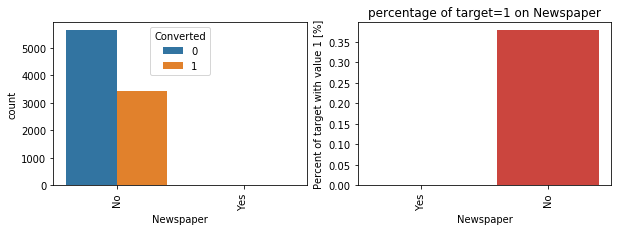

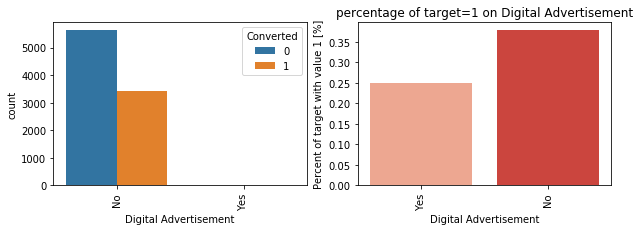

In [450]:

for i in category[10:15]:
    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,1)
    a=sns.countplot(x=i,hue="Converted",data=df)
    a.set_xticklabels( a.get_xticklabels(), rotation=90 )
    
  
    
    plt.subplot(1,2,2)
    cat_perc = df[[i, 'Converted']].groupby([i],as_index=False).mean()
    cat_perc.sort_values(by=i,ascending=False,inplace=True)
    s = sns.barplot(x = i, y='Converted', order=cat_perc[i], data=cat_perc,palette="Reds")
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.title("percentage of target=1 on "+i)
    plt.show()

### Inference:
     
 No conclusion can be drawn for above parameters as more number of entries are for No   

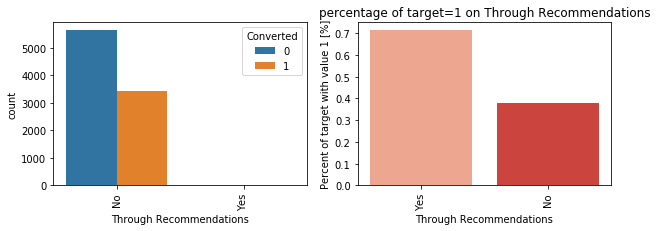

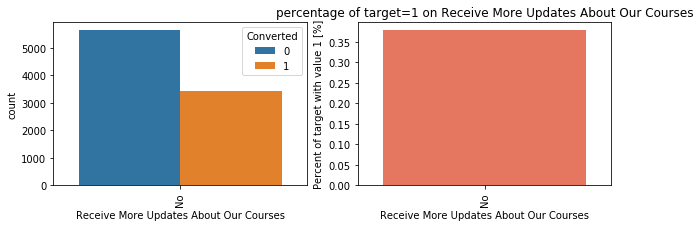

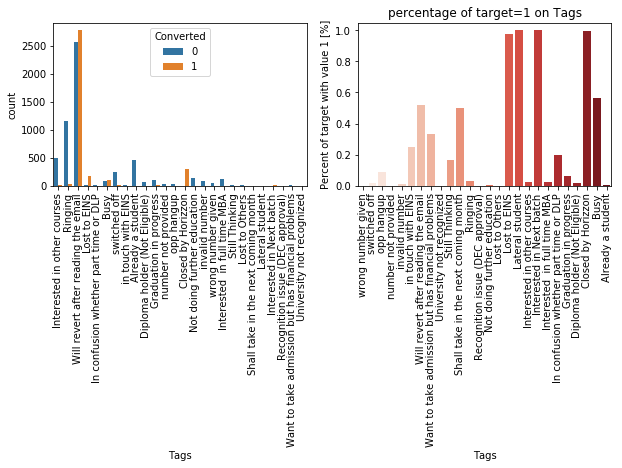

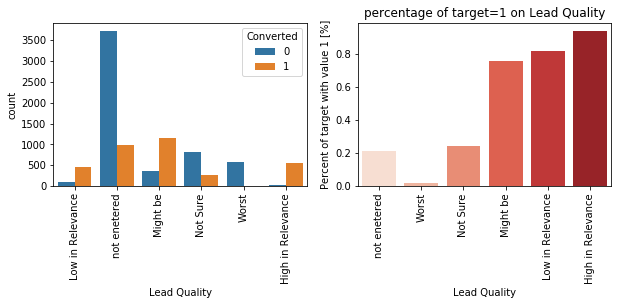

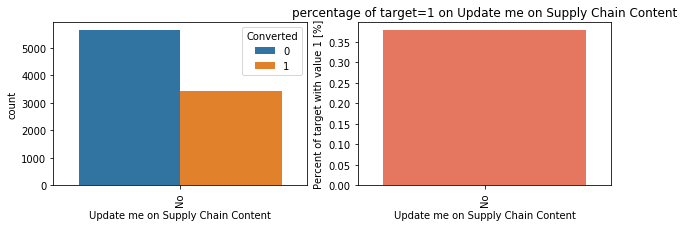

In [451]:
for i in category[15:20]:
    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,1)
    a=sns.countplot(x=i,hue="Converted",data=df)
    a.set_xticklabels( a.get_xticklabels(), rotation=90 )
    
  
    
    plt.subplot(1,2,2)
    cat_perc = df[[i, 'Converted']].groupby([i],as_index=False).mean()
    cat_perc.sort_values(by=i,ascending=False,inplace=True)
    s = sns.barplot(x = i, y='Converted', order=cat_perc[i], data=cat_perc,palette="Reds")
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.title("percentage of target=1 on "+i)
    plt.show()

### Inference:

1.No conclusion can be drawn for "Through Recommendations","Receive More Updates About Our Courses" and "Update me on Supply Chain Content" as more number of entries are for No.

2.For Tags, more number of leads belong to 'will revert after reading the email' but the conversion rate is only 60%. But 100% conversion rate is for 'Interested in next batch' and 'lateral students' ,so more focus should be on them 

3.For Lead Quality, around 90% conversion rate is for High in relevance



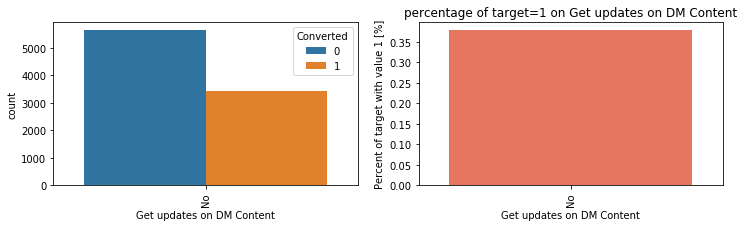

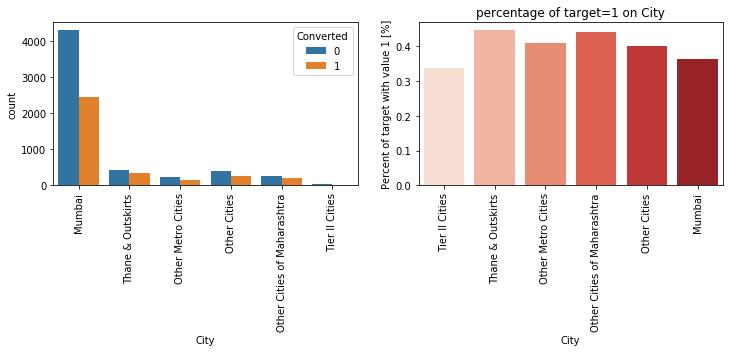

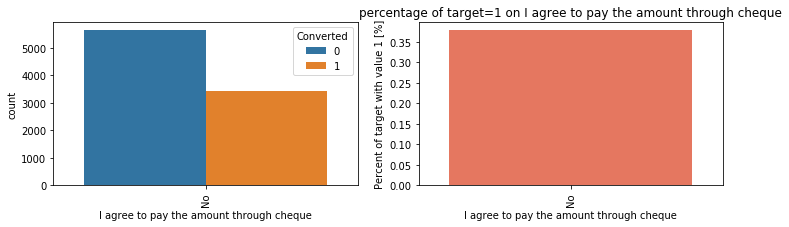

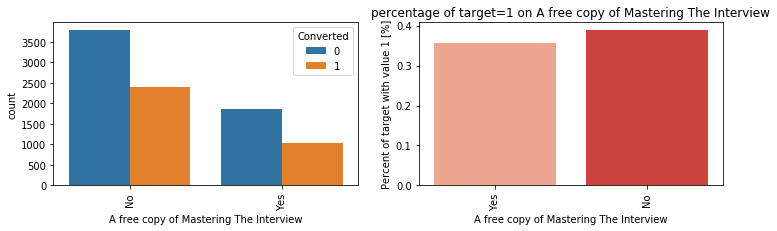

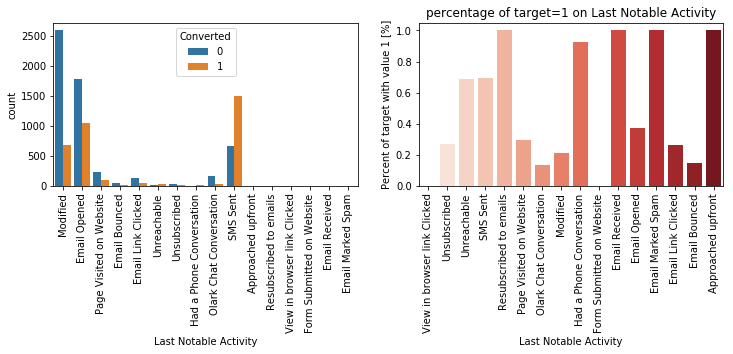

In [452]:
for i in category[20:25]:
    plt.figure(figsize=(12,3))
    
    plt.subplot(1,2,1)
    a=sns.countplot(x=i,hue="Converted",data=df)
    a.set_xticklabels( a.get_xticklabels(), rotation=90 )
    
  
    
    plt.subplot(1,2,2)
    cat_perc = df[[i, 'Converted']].groupby([i],as_index=False).mean()
    cat_perc.sort_values(by=i,ascending=False,inplace=True)
    s = sns.barplot(x = i, y='Converted', order=cat_perc[i], data=cat_perc,palette="Reds")
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.title("percentage of target=1 on "+i)
    plt.show()

### Inference:

1..No conclusion can be drawn for "Get updates on DM Content" and "I agree to pay the amount through cheque" parameters as more number of entries are for No.

2.Almost all the cities have conversion rate of 35-50%

3.Leads who follow a free copy of mastering the interview have 35% conversion rate whereas who do not follow have conversion of 40%

4.Most of the lead have their Email opened as their last notable activity.conversion rate for leads with last notable activity as SMS Sent is almost 70%

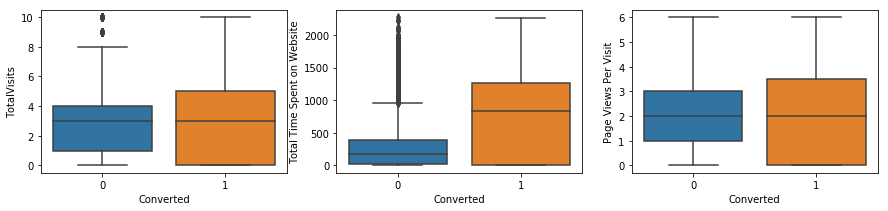

In [453]:
plt.figure(figsize=(15,3))

#creating duplicate df for visualization and removing outliers
dup_df=df.copy()


plt.subplot(1,3,1)
percentiles = dup_df['TotalVisits'].quantile([0.05,0.95]).values
dup_df['TotalVisits'][dup_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
dup_df['TotalVisits'][dup_df['TotalVisits'] >= percentiles[1]] = percentiles[1]
sns.boxplot(y=(dup_df["TotalVisits"]), x=(dup_df["Converted"]))

plt.subplot(1,3,2)
sns.boxplot(y=df["Total Time Spent on Website"],x=df["Converted"])

plt.subplot(1,3,3)
percentiles = dup_df['Page Views Per Visit'].quantile([0.05,0.95]).values
dup_df['Page Views Per Visit'][dup_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
dup_df['Page Views Per Visit'][dup_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]
sns.boxplot(y=(dup_df['Page Views Per Visit']),x=dup_df["Converted"])
    


Inference
1. There are more ouliers in the data and the median is same forboth the catefories
2. Leads spending more time on the weblise are more likely to be converted.
3. There are more outliers on the data and median remains almost same for both the categories
    


There were lot of features which adds no value and removing them for further analysis

In [454]:
df = df.drop(['Lead Number','What matters most to you in choosing a course','Search','Country','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],axis=1)

In [455]:
df.shape

(9074, 16)

### Data Preparation 

### - Data Encoding

In [456]:
df.head(3)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,others,Unemployed,Ringing,not enetered,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened


In [457]:
#Binary transformation :

binary_list=["Do Not Email","Do Not Call"]

for i in binary_list:
    df[i]=df[i].apply(lambda x : 1 if(x=="Yes") else 0)
    

In [458]:
#multiple level of categories

ctgry_list=[ 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'Lead Quality', 'City', 'Last Notable Activity'  ]

df1=pd.get_dummies(df[ctgry_list],drop_first=True)

In [459]:
#concatenating the df1 to the original dataframe
new_df=pd.concat([df,df1],axis=1)


In [460]:
#dropping the duplicate column
new_df = new_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
              'What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [461]:
new_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Train-Test split :


In [462]:
from sklearn.model_selection import train_test_split


#splitting the new_df into X by dropping the target variable=converted
x_df= new_df.drop ( ["Prospect ID","Converted"],axis=1)
x_df.head(3)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [463]:
#adding the target variable to Y
y_df=new_df["Converted"]
y_df.head(3)

0    0
1    0
2    1
Name: Converted, dtype: int64

In [464]:
#splitting the dataframe into train (70%) and test (30%)
X_train, X_test,y_train,y_test = train_test_split(x_df,y_df,train_size=0.7, random_state=100)

In [465]:
#examining shape 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6351, 117) (6351,)
(2723, 117) (2723,)


### Standardization/Scaling

In [466]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head(3)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [467]:
# Checking the conversion  Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

### Model Building

In [468]:
#running first model :


import statsmodels.api as sm

logreg1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logreg1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6236
Model Family:                Binomial   Df Model:                          114
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1141.3
Date:                Sun, 17 Nov 2019   Deviance:                       2282.6
Time:                        21:20:35   Pearson chi2:                 1.21e+05
No. Iterations:                    24   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     26.6012   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                              -1.4537      0.349     -4.161      0.000      -2.138      -0.769
Do Not Call                                               20.6362   1.47e+05      0.000      1.000   -2.88e+05    2.88e+05
TotalVisits                                                0.1389      0.039      3.548      0.000       0.062       0.216
Total Time Spent on Website                                1.1479      0.066     17.276      0.000       1.018       1.278
Page Views Per Visit                                      -0.0901      0.077     -1.163      0.245      -0.242       0.062
Lead Origin_Landing Page Submission                       -1.0423      0.242     -4.313      0.000      -1.516      -0.569
Lead Origin_Lead Add Form                                 -2.8642      3.878     -0.739      0.460     -10.465       4.737
Lead Origin_Lead Import                                   27.7685   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Direct Traffic                                -3.3888      4.605     -0.736      0.462     -12.414       5.636
Lead Source_Facebook                                     -29.8503   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                        -3.1738      4.603     -0.690      0.490     -12.195       5.848
Lead Source_Live Chat                                     21.3179   1.49e+05      0.000      1.000   -2.91e+05    2.91e+05
Lead Source_NC_EDM                                        23.1419   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Olark Chat                                    -2.2540      4.597     -0.490      0.624     -11.263       6.755
Lead Source_Organic Search                                -3.4012      4.605     -0.739      0.460     -12.427       5.625
Lead Source_Pay per Click Ads                            -19.2080   2.16e+05  -8.89e-05      1.000   -4.23e+05    4.23e+05
Lead Source_Press_Release                                -25.4726   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Reference                                      1.0977      2.497      0.440      0.660      -3.796       5.992
Lead Source_Referral Sites                                -3.4387      4.627     -0.743      0.457     -12.508       5.631
Lead Source_Social Media                                  -1.1190      6.239     -0.179      0.858     -13.348      11.110
Lead Source_WeLearn                                    -2.083e-09   8.57e-05  -2.43e-05      1.000      -0.000       0.000
Lead Source_Welingak Website                               4.8429      2.584      1.874

### Recursive feature elimination

Using RFE method to filter only 15 features which are more relevant

In [469]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#creating a log reg object for RFE
logreg=LogisticRegression()

rfe=RFE(logreg,15)
rfe = rfe.fit(X_train, y_train)

In [470]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False])

In [471]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 90),
 ('TotalVisits', False, 74),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 79),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Source_Direct Traffic', False, 46),
 ('Lead Source_Facebook', False, 62),
 ('Lead Source_Google', False, 48),
 ('Lead Source_Live Chat', False, 96),
 ('Lead Source_NC_EDM', False, 23),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 47),
 ('Lead Source_Pay per Click Ads', False, 102),
 ('Lead Source_Press_Release', False, 86),
 ('Lead Source_Reference', False, 78),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Social Media', False, 72),
 ('Lead Source_WeLearn', False, 103),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 58),
 ('Lead Source_blog', False, 50),
 ('Lead Source_google', False, 44),
 ('Lead Source_test

In [472]:
#Columns with only features that is selected from RFE
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Lead Quality_not enetered', 'Last Notable Activity_Modified'],
      dtype='object')

#### Creating 2nd model using features from RFE 

In [473]:
X_train_sm = sm.add_constant(X_train[col])
logreg2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1431.2
Date:                Sun, 17 Nov 2019   Deviance:                       2862.5
Time:                        21:20:39   Pearson chi2:                 1.96e+05
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.2750      0.148     -8.613      0.000      -1.565      -0.985
Do Not Email                                -1.2018      0.234     -5.135      0.000      -1.661      -0.743
Lead Origin_Lead Add Form                    0.7320      0.418      1.751      0.080      -0.087       1.551
Lead Source_Welingak Website                 3.6469      0.846      4.310      0.000       1.988       5.305
Last Activity_SMS Sent                       2.0988      0.107     19.678      0.000       1.890       2.308
Tags_Closed by Horizzon                      9.3377      0.780     11.965      0.000       7.808      10.867
Tags_Lost to EINS                           10.1403      0.768     13.201      0.000       8.635      11.646
Tags_Ringing                                -3.0015      0.277    -10.836      0.000      -3.544      -2.459
Tags_Will revert after reading the email     4.3644      0.201     21.765      0.000       3.971       4.757
Tags_invalid number                        -23.9883   2.15e+04     -0.001      0.999   -4.21e+04    4.21e+04
Tags_number not provided                   -24.5702   4.03e+04     -0.001      1.000    -7.9e+04     7.9e+04
Tags_switched off                           -3.2817      0.539     -6.089      0.000      -4.338      -2.225
Tags_wrong number given                    -24.3628   3.06e+04     -0.001      0.999      -6e+04       6e+04
Lead Quality_Worst                          -3.8340      0.885     -4.334      0.000      -5.568      -2.100
Lead Quality_not enetered                   -4.2610      0.158    -27.037      0.000      -4.570      -3.952
Last Notable Activity_Modified              -1.7760      0.115    -15.415      0.000      -2.002      -1.550
============================================================================================================
"""

dropping the feature "Tags_invalid number" as it has p value close to 0.99

In [474]:
#dropping the feature "Tags_invalid number" as it has p value close to 0.99
col1=col.drop("Tags_invalid number")
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_number not provided',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Worst',
       'Lead Quality_not enetered', 'Last Notable Activity_Modified'],
      dtype='object')

### creating 3rd model 

In [475]:
X_train_sm = sm.add_constant(X_train[col1])
logreg3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1442.5
Date:                Sun, 17 Nov 2019   Deviance:                       2884.9
Time:                        21:20:40   Pearson chi2:                 1.86e+05
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3971      0.147     -9.488      0.000      -1.686      -1.109
Do Not Email                                -1.2082      0.233     -5.194      0.000      -1.664      -0.752
Lead Origin_Lead Add Form                    0.7704      0.420      1.836      0.066      -0.052       1.593
Lead Source_Welingak Website                 3.6060      0.846      4.260      0.000       1.947       5.265
Last Activity_SMS Sent                       2.0641      0.106     19.504      0.000       1.857       2.271
Tags_Closed by Horizzon                      9.4260      0.780     12.081      0.000       7.897      10.955
Tags_Lost to EINS                           10.2391      0.768     13.329      0.000       8.733      11.745
Tags_Ringing                                -2.8497      0.275    -10.367      0.000      -3.388      -2.311
Tags_Will revert after reading the email     4.4810      0.200     22.416      0.000       4.089       4.873
Tags_number not provided                   -23.4196   2.45e+04     -0.001      0.999    -4.8e+04     4.8e+04
Tags_switched off                           -3.1281      0.538     -5.817      0.000      -4.182      -2.074
Tags_wrong number given                    -23.2125   1.86e+04     -0.001      0.999   -3.65e+04    3.64e+04
Lead Quality_Worst                          -3.8817      0.881     -4.408      0.000      -5.608      -2.156
Lead Quality_not enetered                   -4.2484      0.157    -27.056      0.000      -4.556      -3.941
Last Notable Activity_Modified              -1.7550      0.115    -15.284      0.000      -1.980      -1.530
============================================================================================================
"""

dropping the feature "Tags_wrong number given" as it has p value close to 0.99

In [476]:
col2 = col1.drop('Tags_wrong number given',1)
col2

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_number not provided',
       'Tags_switched off', 'Lead Quality_Worst', 'Lead Quality_not enetered',
       'Last Notable Activity_Modified'],
      dtype='object')

### creating 4th model

In [477]:
X_train_sm = sm.add_constant(X_train[col2])
logreg4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1450.2
Date:                Sun, 17 Nov 2019   Deviance:                       2900.4
Time:                        21:20:40   Pearson chi2:                 1.83e+05
No. Iterations:                    22   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4869      0.146    -10.152      0.000      -1.774      -1.200
Do Not Email                                -1.2313      0.231     -5.321      0.000      -1.685      -0.778
Lead Origin_Lead Add Form                    0.7988      0.421      1.897      0.058      -0.027       1.624
Lead Source_Welingak Website                 3.5789      0.847      4.225      0.000       1.919       5.239
Last Activity_SMS Sent                       2.0452      0.105     19.402      0.000       1.839       2.252
Tags_Closed by Horizzon                      9.4950      0.780     12.170      0.000       7.966      11.024
Tags_Lost to EINS                           10.3118      0.768     13.420      0.000       8.806      11.818
Tags_Ringing                                -2.7433      0.273    -10.035      0.000      -3.279      -2.207
Tags_Will revert after reading the email     4.5670      0.199     22.895      0.000       4.176       4.958
Tags_number not provided                   -22.3132   1.49e+04     -0.001      0.999   -2.92e+04    2.91e+04
Tags_switched off                           -3.0200      0.537     -5.624      0.000      -4.072      -1.968
Lead Quality_Worst                          -3.8379      0.884     -4.342      0.000      -5.571      -2.105
Lead Quality_not enetered                   -4.2395      0.157    -27.042      0.000      -4.547      -3.932
Last Notable Activity_Modified              -1.7442      0.115    -15.221      0.000      -1.969      -1.520
============================================================================================================
"""

dropping the feature "Tags_number not provided" as it has p value close to 0.99


In [478]:
col3 = col2.drop('Tags_number not provided',1)
col3

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Lead Quality_not enetered',
       'Last Notable Activity_Modified'],
      dtype='object')

### creating 5th model

In [479]:
X_train_sm = sm.add_constant(X_train[col3])
logreg5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1455.2
Date:                Sun, 17 Nov 2019   Deviance:                       2910.3
Time:                        21:20:40   Pearson chi2:                 1.81e+05
No. Iterations:                     9   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5423      0.146    -10.558      0.000      -1.829      -1.256
Do Not Email                                -1.2511      0.230     -5.439      0.000      -1.702      -0.800
Lead Origin_Lead Add Form                    0.8170      0.422      1.936      0.053      -0.010       1.644
Lead Source_Welingak Website                 3.5621      0.847      4.204      0.000       1.901       5.223
Last Activity_SMS Sent                       2.0339      0.105     19.344      0.000       1.828       2.240
Tags_Closed by Horizzon                      9.5337      0.780     12.220      0.000       8.005      11.063
Tags_Lost to EINS                           10.3529      0.769     13.471      0.000       8.847      11.859
Tags_Ringing                                -2.6778      0.273     -9.824      0.000      -3.212      -2.144
Tags_Will revert after reading the email     4.6184      0.199     23.171      0.000       4.228       5.009
Tags_switched off                           -2.9532      0.537     -5.504      0.000      -4.005      -1.902
Lead Quality_Worst                          -3.7989      0.887     -4.283      0.000      -5.537      -2.060
Lead Quality_not enetered                   -4.2330      0.157    -27.031      0.000      -4.540      -3.926
Last Notable Activity_Modified              -1.7342      0.114    -15.152      0.000      -1.959      -1.510
============================================================================================================
"""

All features have p value less than 0.5, hence proceeding with model

In [480]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.239230
1012    0.082565
9226    0.019446
4750    0.706189
7987    0.999889
1281    0.994000
2880    0.239230
4971    0.620480
7536    0.955897
1248    0.000288
dtype: float64

In [481]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.39230257e-01, 8.25649855e-02, 1.94463622e-02, 7.06188922e-01,
       9.99889489e-01, 9.93999952e-01, 2.39230257e-01, 6.20479768e-01,
       9.55896887e-01, 2.87649186e-04])

Creating a dataframe with the predicted probabilities

In [482]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.239230,3009
1,0,0.082565,1012
2,0,0.019446,9226
3,1,0.706189,4750
4,1,0.999889,7987


#### converting the probability value into 0's and 1's 

In [483]:
#converting the probability value into 0's and 1's by choosing a cutoff of 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.239230,3009,0
1,0,0.082565,1012,0
2,0,0.019446,9226,0
3,1,0.706189,4750,1
4,1,0.999889,7987,1


#### Model Evaluvation 

In [484]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3745  160]
 [ 340 2106]]


In [485]:
# Predicted     not_churn    churn
# Actual
# not_churn        3745      160
# churn            340       2106  

In [486]:
#overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9212722405920327


### VIF

In [487]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Will revert after reading the email,2.70
10,Lead Quality_not enetered,2.44
11,Last Notable Activity_Modified,1.59
1,Lead Origin_Lead Add Form,1.57
3,Last Activity_SMS Sent,1.57
2,Lead Source_Welingak Website,1.35
6,Tags_Ringing,1.28
4,Tags_Closed by Horizzon,1.17
0,Do Not Email,1.12
9,Lead Quality_Worst,1.11


All variables have a low value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### Sensitivity, Specificity

In [488]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [489]:
# sensitivity 
TP / float(TP+FN)

0.8609975470155355

In [490]:
#specificity
TN / float(TN+FP)

0.9590268886043534

In [491]:
#false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.040973111395646605


In [492]:
# positive predictive value 
print (TP / float(TP+FP))

0.9293909973521624


In [493]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9167686658506732


### ROC Curve

In [494]:
def draw_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None



In [495]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

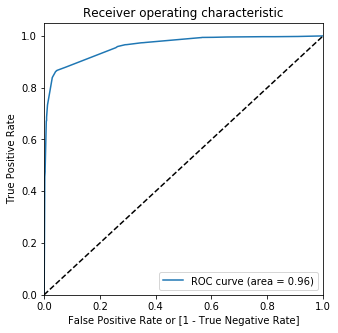

In [496]:
draw_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Optimal cutoff point

In [497]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.239230,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.082565,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.019446,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.706189,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.999889,7987,1,1,1,1,1,1,1,1,1,1,1


In [498]:
# accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.783184  0.971791  0.665045
0.2   0.2  0.822390  0.959117  0.736748
0.3   0.3  0.920485  0.866721  0.954161
0.4   0.4  0.921115  0.864677  0.956466
0.5   0.5  0.921272  0.860998  0.959027
0.6   0.6  0.921587  0.860998  0.959539
0.7   0.7  0.920013  0.839330  0.970551
0.8   0.8  0.873563  0.686018  0.991037
0.9   0.9  0.868682  0.671709  0.992061


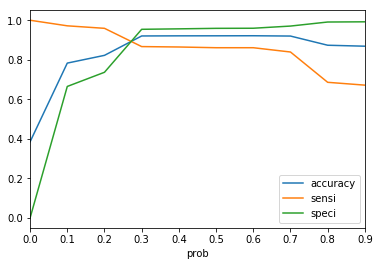

In [499]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [500]:
#### From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.239230,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.082565,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.019446,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.706189,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.999889,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score

In [501]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.239230,3009,0,1,1,1,0,0,0,0,0,0,0,0,24
1,0,0.082565,1012,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.019446,9226,0,1,0,0,0,0,0,0,0,0,0,0,2
3,1,0.706189,4750,1,1,1,1,1,1,1,1,1,0,0,1,71
4,1,0.999889,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


In [502]:
#  overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [503]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8793949304987735

In [504]:
# Let us calculate specificity
TN / float(TN+FP)

0.9224071702944943

In [505]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07759282970550577


In [506]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8765281173594132


In [507]:
# Negative predictive value
print (TN / float(TN+ FN))

0.924300744162176


In [508]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3745,  160],
       [ 340, 2106]], dtype=int64)

### Precision and Recall

In [509]:
##### Precision
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9293909973521624

As the precision value is 0.92, we have met the business goal that required us to achieve 80% conversion rate

In [510]:
##### Recall
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8609975470155355

### Precision and recall tradeoff¶

In [511]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [512]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

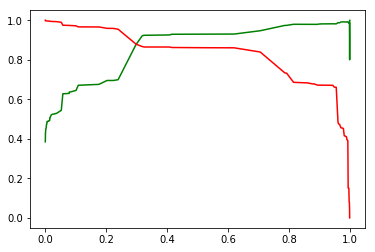

In [513]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### predictions on the test set

### test-standardisation

In [514]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,0.058552,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [515]:
#selecting only the featues that are required for modelling 

X_test = X_test[col3]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Lead Quality_not enetered,Last Notable Activity_Modified
3271,0,0,0,0,0,0,0,1,0,0,1,0
1490,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,1,0,0,1,0
4216,0,1,0,0,1,0,0,0,0,0,0,1
3830,0,0,0,0,0,0,0,1,0,0,1,0


In [516]:
#predicting values on test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [517]:
#y_test prediction values
y_test_pred[:10]

3271    0.239230
1490    0.955897
7936    0.239230
4216    0.999154
3830    0.239230
1800    0.955897
6507    0.100992
4821    0.000162
4223    0.997341
4714    0.297912
dtype: float64

In [518]:
# Converting y_pred to a dataframe which is an array
y_pred_final = pd.DataFrame(y_test_pred)

In [519]:
# Let's see the head
y_pred_final.head()

,0
3271,0.239230
1490,0.955897
7936,0.239230
4216,0.999154
3830,0.239230


In [520]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [521]:
#adding CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [522]:
# Removing index for both dataframes to append them side by side 
y_pred_final.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [523]:
# Appending y_test_df and y_pred_final
y_pred_final1 = pd.concat([y_test_df, y_pred_final],axis=1)

In [524]:
y_pred_final1.head()

,Converted,Prospect ID,0
0,0,3271,0.239230
1,1,1490,0.955897
2,0,7936,0.239230
3,1,4216,0.999154
4,0,3830,0.239230


In [525]:
# Renaming the column 
y_pred_final1= y_pred_final1.rename(columns={ 0 : 'Converted_prob'})

In [526]:
# Rearranging the columns
y_pred_final1 = y_pred_final1.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

In [527]:
# Let's see the head of y_pred_final
y_pred_final1.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.239230
1,1490,1,0.955897
2,7936,0,0.239230
3,4216,1,0.999154
4,3830,0,0.239230


In [528]:
y_pred_final1['final_predicted'] = y_pred_final1.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

### Assigning Leadscore to test data

In [529]:
y_pred_final1['Lead_Score'] = y_pred_final1.Converted_prob.map( lambda x: round(x*100))


In [530]:
y_pred_final1.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.239230,0,24
1,1490,1,0.955897,1,96
2,7936,0,0.239230,0,24
3,4216,1,0.999154,1,100
4,3830,0,0.239230,0,24


In [531]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final1.Converted, y_pred_final1.final_predicted)

0.8968049944913699

In [532]:
confusion2 = metrics.confusion_matrix(y_pred_final1.Converted, y_pred_final1.final_predicted )
confusion2

array([[1594,  140],
       [ 141,  848]], dtype=int64)

In [533]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [534]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8574317492416582

In [535]:
# Let us calculate specificity
TN / float(TN+FP)

0.9192618223760092

#### Subjective questions

1.	Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

In [536]:
from sklearn.decomposition import PCA


#importing PCA
from sklearn.decomposition import PCA


pca= PCA(random_state=42)
pca.fit(X_train[col])


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [537]:
#Expained variance ratio to identify the number of PCA
pca.explained_variance_ratio_

array([0.24500154, 0.23129541, 0.14505766, 0.12209043, 0.05548673,
       0.05477194, 0.04943459, 0.03211358, 0.01960284, 0.01518402,
       0.01015574, 0.00802059, 0.00618142, 0.00345797, 0.00214554])

Text(0.5, 0, ' Number of Principle components')

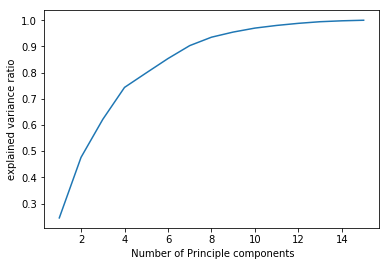

In [538]:
#scree plot using cumulative percentage 
cumsum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(cumsum)+1),cumsum)
plt.ylabel("explained variance ratio")
plt.xlabel(" Number of Principle components")

In [539]:
cumsum

array([0.24500154, 0.47629695, 0.62135461, 0.74344504, 0.79893176,
       0.8537037 , 0.9031383 , 0.93525188, 0.95485472, 0.97003874,
       0.98019449, 0.98821507, 0.99439649, 0.99785446, 1.        ])

From this plot we could see that almost 90% of information canbe captured through 7 PCA


In [540]:
#we are again creating new PCA with 7 components

pca2=PCA(n_components=7, random_state=42)

new=pca2.fit_transform(X_train[col])

In [541]:
#storing them in final df for further modelling

final_df= pd.DataFrame(new,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7"])

final_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.625816,-0.163035,-0.367040,-0.306446,0.006130,0.024245,-0.068803
1,-0.641759,-0.105786,-0.308005,-0.238146,0.780169,0.087669,0.525977
2,0.946194,0.261006,0.244852,0.941143,-0.177100,-0.578062,0.052380


#### To identify the top three variables

In [542]:


n_pcs= pca2.components_.shape[0]


# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca2.components_[i]).argmax() for i in range(n_pcs)]


initial_feature_names = col

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]


# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}


# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

df

,0,1
0,PC1,Lead Quality_not enetered
1,PC2,Last Notable Activity_Modified
2,PC3,Last Notable Activity_Modified
3,PC4,Last Activity_SMS Sent
4,PC5,Do Not Email
5,PC6,Tags_Ringing
6,PC7,Lead Origin_Lead Add Form


so, from the previous dataframe we can conclude that  
> Lead Quality

> Last Notable Activity

> Last Activity



contributes most towards the probability of a lead getting converted